In [1]:
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.10.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 머신러닝/딥러닝 : 법칙성을 추출
    - 다양한 분야에서 응용 : 글씨인식, 문장분류, 질병진단, 얼굴식별, etc...
    
    - 지도학습 vs 비지도학습(군집) vs 강화학습(게임)
- 1. 데이터 확보 및 생성(inputdata, outputdata)
- 2. 데이터 전처리 (결측치, 스케일조정, 훈련데이터셋과 검증데이터셋, 시험데이터셋으로 분류..)
- 3. 모델 구성
- 4. 모델 학습 과정 설정(손실 함수, 옵티마이저, 평가지표)
- 5. 모델 학습 시키기
- 6. 모델 평가(시험데이터셋으로)
- 7. 모델 사용(모델 저장 후, 저장된 모델을 이용하여, 입력값이 주어지면 예측값 받기

# 1. 데이터 셋 생성
# 2. 데이터 전처리

In [13]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical # 분류분석시 원핫인코딩
from tensorflow.keras.models import Sequential #모델 생성
from tensorflow.keras.layers import Dense, Input # 모델에 레이어 추가시 

In [4]:
# 학습데이터 == 훈련데이터
X_train = np.array([1,2,3,4,5,6,7,8,9]*10)
Y_train = np.array([2,4,6,8,10,12,14,16,18]*10)
# 검증데이터
X_val = np.array([1,2,3,4,5,6,7,8,9])
Y_val = np.array([2,4,6,8,10,12,14,16,18])

In [11]:
# 분류 분석을 위해 target 변수를 인코딩
# 분류 분석을 위한 인코딩 종류
data = np.array(['a','b','b','b','c'])
print('원 데이터 :', data)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labeling_data = le.fit_transform(data)
print('라벨 인코딩 된 데이터 :', labeling_data)
one_hot_encoding_data = to_categorical(labeling_data)
print('원핫 인코딩 된 데이터 :\n', one_hot_encoding_data)

원 데이터 : ['a' 'b' 'b' 'b' 'c']
라벨 인코딩 된 데이터 : [0 1 1 1 2]
원핫 인코딩 된 데이터 :
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [20]:
# 분류분석을 위한 원핫인코딩 방법
data = np.array([1,2,2,3,2])
print('원 데이터 :')
print(data)
categorical_one_hot = to_categorical(data)
print('to_categorical을 이용한 원 핫 인코딩 (넘파이 배열)')
print(categorical_one_hot)
print('get_dummies를 이용한 원 핫 인코딩 (데이터 프레임)')
display(pd.get_dummies(data))

원 데이터 :
[1 2 2 3 2]
to_categorical을 이용한 원 핫 인코딩 (넘파이 배열)
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
get_dummies를 이용한 원 핫 인코딩 (데이터 프레임)


,1,2,3
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [21]:
# 분류분석을 위해 종속변수(target변수)를 원핫인코딩
Y_train = to_categorical(Y_train, 19)
Y_val = to_categorical(Y_val)

In [22]:
Y_train[:2]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]], dtype=float32)

In [23]:
X_train[:2]

array([1, 2])

In [24]:
Y_train[:2]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]], dtype=float32)

# 3. 모델 구성

In [25]:
model = Sequential()
model.add(Input(shape=(1,)))
# Dense(출력, 입력)
model.add(Dense(units=38, activation='sigmoid'))   # units : 출력갯수, activation(활성화함수)
model.add(Dense(units=64, activation='elu'))
model.add(Dense(units=32, activation='elu'))
model.add(Dense(units=19, activation='softmax'))   #  activation='softmax' : 모든 출력의 합이 1
# 분류분석의 마지막 layer 에서 activation 함수로 사용
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________
None


# 4. 모델 학습과정 설정
- 손실함수, 옵티마이저, 평가지표
    * loss='categorical_crossentropy' : 딥러닝 훈련시 다중분류분석(손실함수)에서 사용함
    * 모델의 예측 확률분포와 실제값의 확률 분포가 얼마나 다른지를 계산함
    * metrics=['accuracy'] : 정확도

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기

In [31]:
hist = model.fit(X_train, Y_train, # 훈련 (학습)데이터
                epochs=300, # 학습 횟수
                batch_size=10, # 가중치를 조정하는 단위
                verbose=2, # 0: 출력없음. 1: 진행상황만출력, 2: 에포크별로그 메세지 보여짐
                validation_data=(X_val, Y_val) # 검증 데이터셋
                )

Epoch 1/300
9/9 - 1s - loss: 2.7813 - accuracy: 0.1111 - val_loss: 2.5824 - val_accuracy: 0.2222 - 1s/epoch - 120ms/step
Epoch 2/300
9/9 - 0s - loss: 2.5136 - accuracy: 0.1111 - val_loss: 2.3987 - val_accuracy: 0.1111 - 67ms/epoch - 7ms/step
Epoch 3/300
9/9 - 0s - loss: 2.3459 - accuracy: 0.1111 - val_loss: 2.2751 - val_accuracy: 0.1111 - 68ms/epoch - 8ms/step
Epoch 4/300
9/9 - 0s - loss: 2.2457 - accuracy: 0.0444 - val_loss: 2.1858 - val_accuracy: 0.2222 - 64ms/epoch - 7ms/step
Epoch 5/300
9/9 - 0s - loss: 2.1644 - accuracy: 0.2222 - val_loss: 2.1184 - val_accuracy: 0.2222 - 62ms/epoch - 7ms/step
Epoch 6/300
9/9 - 0s - loss: 2.0997 - accuracy: 0.2778 - val_loss: 2.0581 - val_accuracy: 0.3333 - 63ms/epoch - 7ms/step
Epoch 7/300
9/9 - 0s - loss: 2.0423 - accuracy: 0.4111 - val_loss: 2.0060 - val_accuracy: 0.4444 - 64ms/epoch - 7ms/step
Epoch 8/300
9/9 - 0s - loss: 1.9966 - accuracy: 0.3333 - val_loss: 1.9578 - val_accuracy: 0.3333 - 65ms/epoch - 7ms/step
Epoch 9/300
9/9 - 0s - loss: 1.9

Epoch 69/300
9/9 - 0s - loss: 0.4432 - accuracy: 0.9222 - val_loss: 0.4214 - val_accuracy: 1.0000 - 60ms/epoch - 7ms/step
Epoch 70/300
9/9 - 0s - loss: 0.4232 - accuracy: 1.0000 - val_loss: 0.4021 - val_accuracy: 1.0000 - 59ms/epoch - 7ms/step
Epoch 71/300
9/9 - 0s - loss: 0.4068 - accuracy: 1.0000 - val_loss: 0.3922 - val_accuracy: 1.0000 - 60ms/epoch - 7ms/step
Epoch 72/300
9/9 - 0s - loss: 0.3972 - accuracy: 1.0000 - val_loss: 0.3830 - val_accuracy: 1.0000 - 58ms/epoch - 6ms/step
Epoch 73/300
9/9 - 0s - loss: 0.3798 - accuracy: 1.0000 - val_loss: 0.3698 - val_accuracy: 1.0000 - 59ms/epoch - 7ms/step
Epoch 74/300
9/9 - 0s - loss: 0.3725 - accuracy: 1.0000 - val_loss: 0.3608 - val_accuracy: 1.0000 - 62ms/epoch - 7ms/step
Epoch 75/300
9/9 - 0s - loss: 0.3637 - accuracy: 1.0000 - val_loss: 0.3498 - val_accuracy: 1.0000 - 61ms/epoch - 7ms/step
Epoch 76/300
9/9 - 0s - loss: 0.3564 - accuracy: 1.0000 - val_loss: 0.3462 - val_accuracy: 1.0000 - 61ms/epoch - 7ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 0.0555 - accuracy: 1.0000 - val_loss: 0.0535 - val_accuracy: 1.0000 - 54ms/epoch - 6ms/step
Epoch 137/300
9/9 - 0s - loss: 0.0533 - accuracy: 1.0000 - val_loss: 0.0523 - val_accuracy: 1.0000 - 57ms/epoch - 6ms/step
Epoch 138/300
9/9 - 0s - loss: 0.0526 - accuracy: 1.0000 - val_loss: 0.0503 - val_accuracy: 1.0000 - 57ms/epoch - 6ms/step
Epoch 139/300
9/9 - 0s - loss: 0.0497 - accuracy: 1.0000 - val_loss: 0.0490 - val_accuracy: 1.0000 - 55ms/epoch - 6ms/step
Epoch 140/300
9/9 - 0s - loss: 0.0489 - accuracy: 1.0000 - val_loss: 0.0476 - val_accuracy: 1.0000 - 62ms/epoch - 7ms/step
Epoch 141/300
9/9 - 0s - loss: 0.0478 - accuracy: 1.0000 - val_loss: 0.0467 - val_accuracy: 1.0000 - 56ms/epoch - 6ms/step
Epoch 142/300
9/9 - 0s - loss: 0.0491 - accuracy: 1.0000 - val_loss: 0.0467 - val_accuracy: 1.0000 - 58ms/epoch - 6ms/step
Epoch 143/300
9/9 - 0s - loss: 0.0486 - accuracy: 1.0000 - val_loss: 0.0453 - val_accuracy: 1.0000 - 55ms/epoch - 6ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 1.0000 - 58ms/epoch - 6ms/step
Epoch 204/300
9/9 - 0s - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 1.0000 - 60ms/epoch - 7ms/step
Epoch 205/300
9/9 - 0s - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 1.0000 - 61ms/epoch - 7ms/step
Epoch 206/300
9/9 - 0s - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000 - 57ms/epoch - 6ms/step
Epoch 207/300
9/9 - 0s - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000 - 65ms/epoch - 7ms/step
Epoch 208/300
9/9 - 0s - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000 - 57ms/epoch - 6ms/step
Epoch 209/300
9/9 - 0s - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 1.0000 - 58ms/epoch - 6ms/step
Epoch 210/300
9/9 - 0s - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000 - 55ms/epoch - 6ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000 - 56ms/epoch - 6ms/step
Epoch 271/300
9/9 - 0s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000 - 56ms/epoch - 6ms/step
Epoch 272/300
9/9 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000 - 57ms/epoch - 6ms/step
Epoch 273/300
9/9 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000 - 55ms/epoch - 6ms/step
Epoch 274/300
9/9 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000 - 57ms/epoch - 6ms/step
Epoch 275/300
9/9 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000 - 55ms/epoch - 6ms/step
Epoch 276/300
9/9 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000 - 53ms/epoch - 6ms/step
Epoch 277/300
9/9 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000 - 55ms/epoch - 6ms/step
Epoch 278/300
9/

# 6.모델과정 평가하기
- 학습과정 중 loss와 평가지표(accuracy)살펴보기, evalate함수

In [32]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

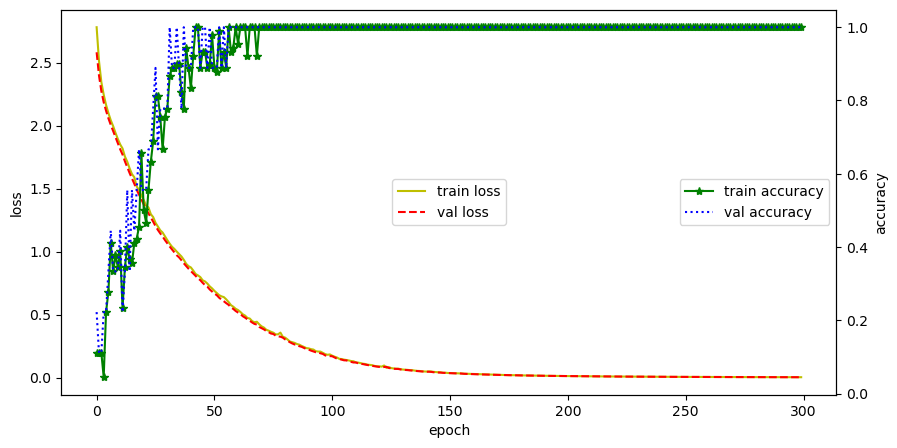

In [54]:
# 학습과정 중의 loss와 accuracy
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r--', label='val loss')
acc_ax = loss_ax.twinx() # loss_ax 와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy', marker = '*')
acc_ax.plot(hist.history['val_accuracy'], 'b:', label='val accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center')
acc_ax.legend(loc='center right')
plt.show()

In [55]:
# 모델 평가하기
score = model.evaluate(X_val, Y_val, batch_size=3)

3/3 [==============================] - 0s 5ms/step - loss: 0.0030 - accuracy: 1.0000


In [57]:
score

[0.0030169060919433832, 1.0]

In [58]:
print('평가된 loss값 :', score[0])
print('평가된 accuracy :', score[1]*100, '%')

평가된 loss값 : 0.0030169060919433832
평가된 accuracy : 100.0 %


# 7. 모델 사용하기(모델을 사용해서 예측하기)

In [63]:
model.predict(np.array([4])).argmax()

1/1 [==============================] - 0s 22ms/step


8

In [65]:
H[0, H.argmax()]

IndexError: invalid index to scalar variable.

# 7. 모델 저장하기

In [66]:
model.save('model/2_deep_begin.h5')

# 저장된 모델 사용하기

In [3]:
from tensorflow.keras.models import load_model
import numpy as np
model2 = load_model('model/2_deep_begin.h5')

In [4]:
H = model2.predict(np.array([2]))
H

1/1 [==============================] - 0s 458ms/step


array([[3.0150766e-23, 0.0000000e+00, 6.7708158e-04, 4.1287121e-35,
        9.9855453e-01, 8.4469429e-28, 7.6840265e-04, 2.2192669e-35,
        1.6937776e-08, 2.4914603e-35, 8.0120760e-17, 3.6738411e-31,
        3.1564810e-25, 1.7890242e-33, 3.4084852e-30, 6.6427870e-29,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [5]:
H[0, H.argmax()]

0.9985545

In [6]:
[round(val, 3) for val in H[0, [2,4,6]]]

[0.001, 0.999, 0.001]